Predicting diabetes can be useful for early detection and prevention of the disease. 

Global data:

- 537 million adults (20-79 years) are living with diabetes (1 in 10). This number is predicted to rise to 643 million by 2030 and 783 million by 2045.
- Over 3 in 4 adults with diabetes live in low- and middle-income countries.
- Diabetes is responsible for 6.7 million deaths in 2021 - 1 every 5 seconds.
- Diabetes caused at least USD 966 billion dollars in health expenditure – a 316% increase over the last 15 years.

Source:
International Diabetes Federation.
IDF Diabetes Atlas, 10th edn. Brussels,
Belgium: 2021. Available at: https://www.diabetesatlas.org

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
#from sklearn.impute import SimpleImputer

Loading the dataset

In [2]:
dfDia = pd.read_csv(".\datasets\diabetes.csv")

In [3]:
dfDia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
dfDia.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

Replacing zero values by NaN.

In [5]:
dfDia[['BMI','Glucose','BloodPressure','SkinThickness','Insulin']] = dfDia[['BMI','Glucose','BloodPressure','SkinThickness','Insulin']].replace(0,np.NaN)

Counting NaN values:

In [6]:
dfDia[['BMI','Glucose','BloodPressure','SkinThickness','Insulin']].isnull().sum()

BMI               11
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
dtype: int64

## K-nearest neighbor (KNN) imputation

Another approach that can help preserve the trend of each class and prevent the introduction of bias is to use more advanced imputation methods that take into account the correlation between the features and the target variable. For example, K-nearest neighbors imputation, where missing values are filled with the mean value of the K-nearest neighbors in the feature space, based on the distance metric. This method could capture the local structure of the data and could be more effective than mean imputation.

First we have to scale the data

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfDia.iloc[:,:-1] = scaler.fit_transform(dfDia.drop('Outcome', axis=1))

Now we have to impute the data with KNN imputer.

In [8]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5, weights = 'distance')
dfDia_imputed = imputer.fit_transform(dfDia)
dfDia = pd.DataFrame(dfDia_imputed, columns=dfDia.columns)

Checking if NaNs values are completely filled.

In [9]:
dfDia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Final histograms

Now, the data is cleaned and imputed. We plot his histogram.

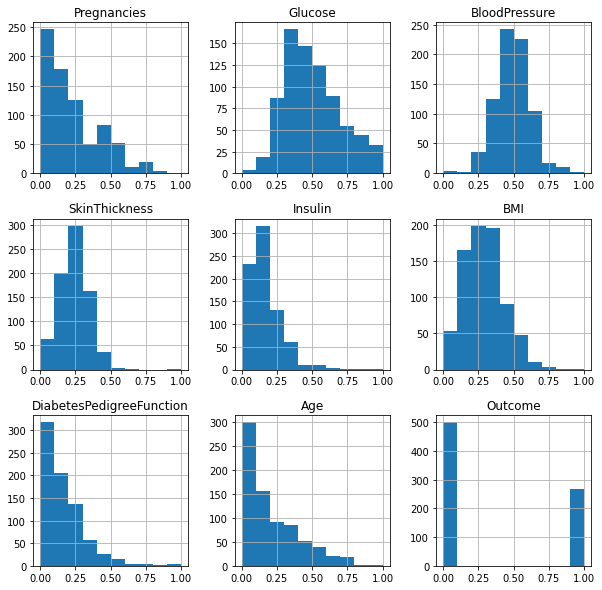

In [10]:
histClean = dfDia.hist(figsize = (10,10))

## Violin plots

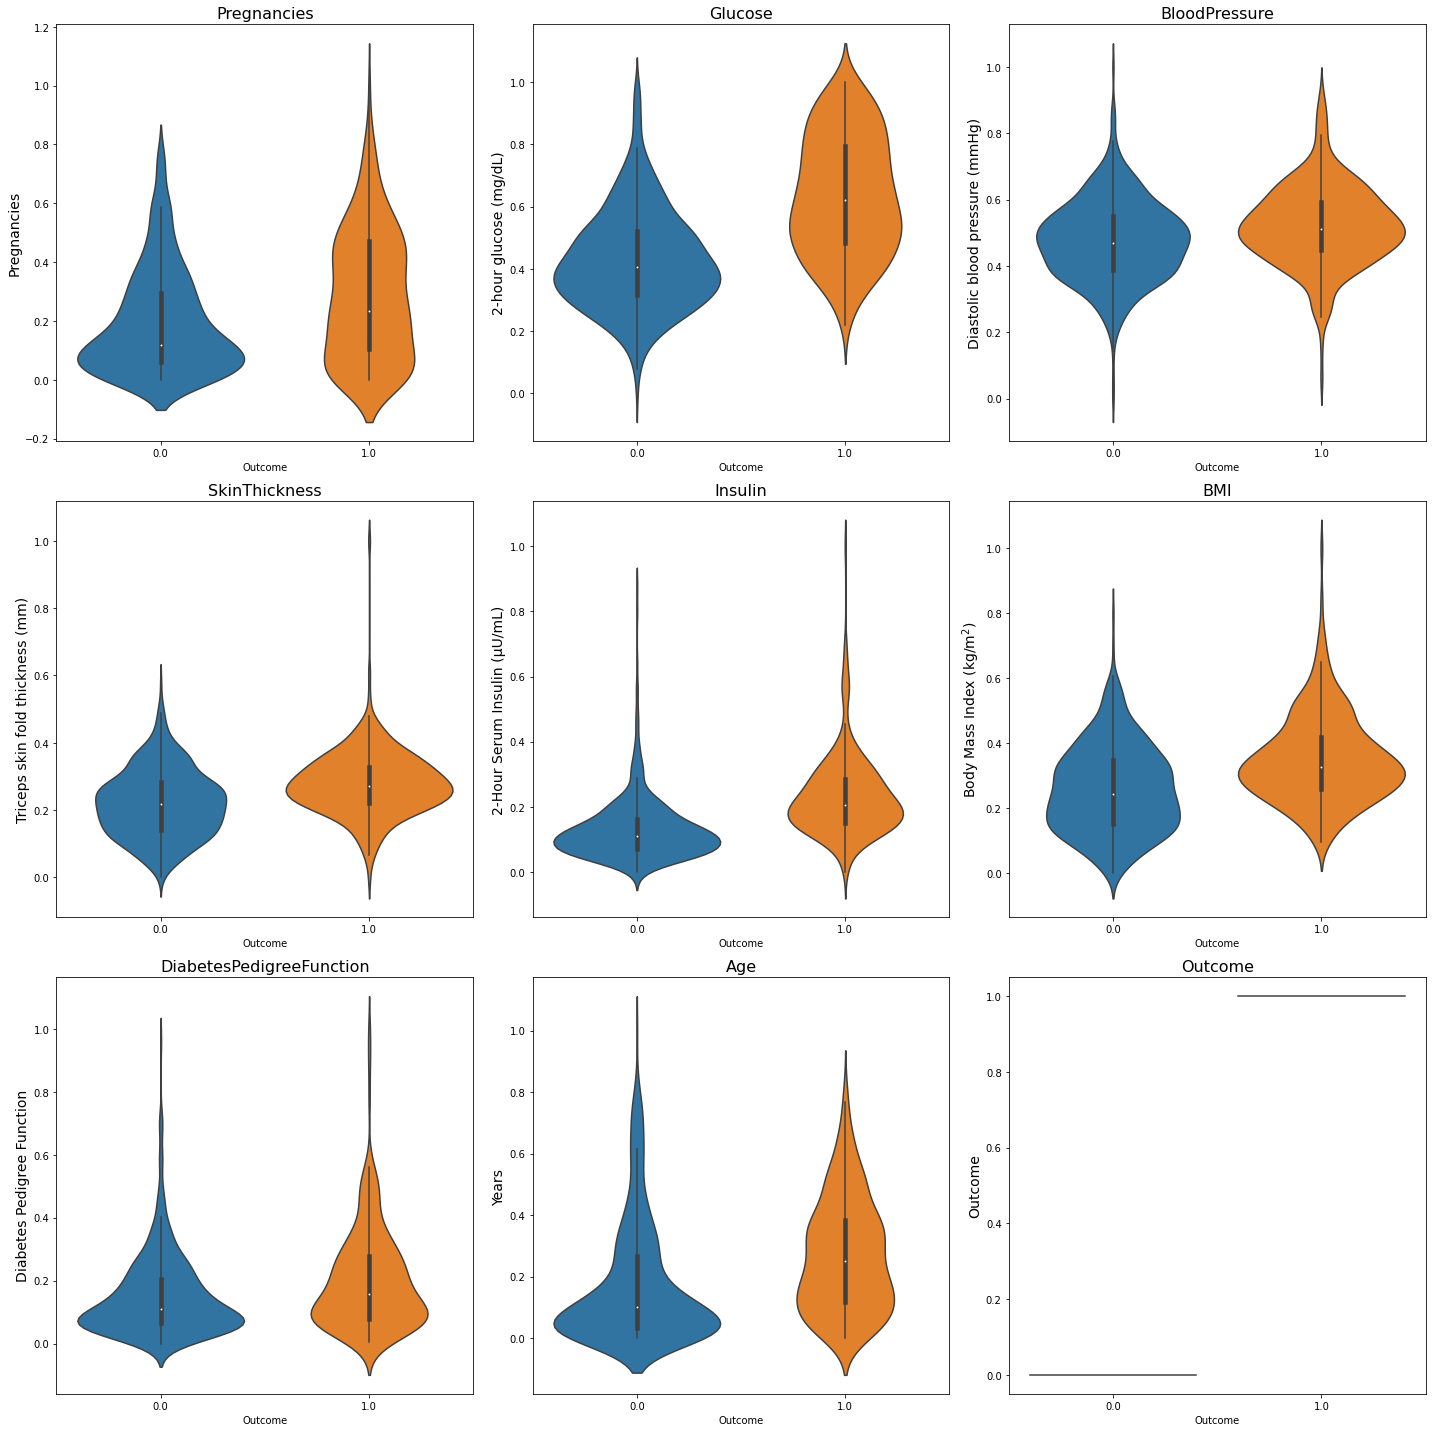

In [11]:
# Define the number of rows and columns for the subplots
nrows, ncols = 3, 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Flatten the axes array
axes = axes.flatten()
# axes = ["a","b","c","a","b","c","a","b","c"]

# Loop over the columns of the DataFrame and plot each column in a separate subfigure
for i, col in enumerate(dfDia.columns):
    sns.violinplot(x="Outcome", y =col, data=dfDia, ax=axes[i])
    axes[0].set_ylabel('Pregnancies', fontsize=14)
    axes[1].set_ylabel('2-hour glucose (mg/dL)', fontsize=14)
    axes[2].set_ylabel('Diastolic blood pressure (mmHg)', fontsize=14)
    axes[3].set_ylabel('Triceps skin fold thickness (mm)', fontsize=14)
    axes[4].set_ylabel('2-Hour Serum Insulin (μU/mL)', fontsize=14)
    axes[5].set_ylabel('Body Mass Index (kg/m$^2$)', fontsize=14)
    axes[6].set_ylabel('Diabetes Pedigree Function', fontsize=14)
    axes[7].set_ylabel('Years', fontsize=14)
    axes[8].set_ylabel('Outcome', fontsize=14)
    
# Set the title of each subfigure to the name of the corresponding column
for ax, col in zip(axes, dfDia.columns):
    ax.set_title(col, fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

It can be seen the distributions in diabetic females have higher values than non diabetic ones. Specially in Glucose, Pregnancies, BMI and Age like in mean imputation. Now, with the KNN imputation it can be seen more differences SkinThickness and Insulin, variables with more NaN values counted before. Like  in conditional mean imputation, we see more displacement of this two groups, but with KNN we have sparse data instead of cumulative in the center of the distribution. In conclusion, KNN imputation have a more natural behavior.

# Correlations

Searching correlation among the columns in the Dataframe using the ‘Pearson’ method.

Since there are no outliers or extreme values that are too far from the rest, Pearson's correlation was chosen instead of Spearman's.

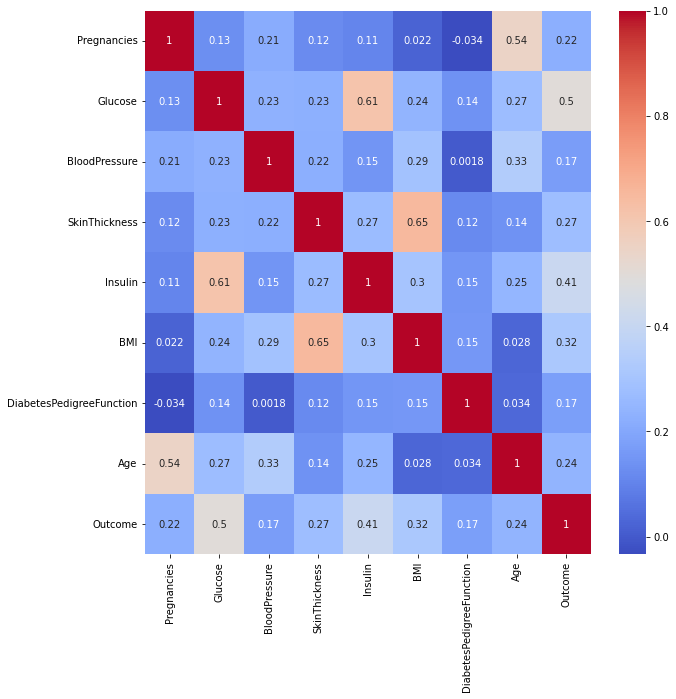

In [12]:
# Calculating correlation
corr_df = dfDia.corr(method ='pearson')
# Creating heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')

# Showing heatmap
plt.show()

In [13]:
# stack() function converts the correlation matrix into a long format, 
#where each row contains a pair of columns and their correlation
# reset_index() function converts the row and column indexes into regular columns
corr_pairs = corr_df[corr_df > 0.25].stack().reset_index()
# Eliminating duplicates
corr_pairs = corr_pairs[corr_pairs['level_0'] < corr_pairs['level_1']]

# Formatting the output
corr_pairs = corr_pairs.rename(columns={'level_0':'col1', 'level_1':'col2', 0:'corr'})
corr_pairs = corr_pairs.sort_values(by='corr', ascending=False)
corr_pairs.reset_index(drop=True)

,col1,col2,corr
0,BMI,SkinThickness,0.651399
1,Glucose,Insulin,0.614597
2,Age,Pregnancies,0.544341
3,Glucose,Outcome,0.497589
4,Insulin,Outcome,0.410259
5,Age,BloodPressure,0.334779
6,BMI,Outcome,0.315442
7,BMI,Insulin,0.299383
8,BMI,BloodPressure,0.292610
9,Outcome,SkinThickness,0.273669


Like in conditional mean imputation we can see new significant direct correlation of SkinThickness and Insulin variables. KNN imputation obtains higher correlation values than conditional mean imputation and simple mean imputation.

Saving in a CSV.

In [14]:
import os
os.getcwd()

'C:\\Users\\marco\\OneDrive\\Escritorio\\ESTUDIOS\\master ciencia de datos\\Practicas IFCA'

In [15]:
dfDia.to_csv("C:\\Users\\marco\\OneDrive\\Escritorio\\ESTUDIOS\\master ciencia de datos\\Practicas IFCA\\datasets\\diabetes_KNNImputation.csv",index=False)

# Algoritmos de Machine Learning:

Load dataset

In [16]:
dfDia = pd.read_csv("./datasets/diabetes_KNNImputation.csv")

Train and test splitting

In [17]:
from sklearn.model_selection import train_test_split
# Splitting train and test 0.75/0.25
X = dfDia.drop('Outcome', axis=1)
y = dfDia['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Decision tree

In [27]:
# Imports for decision tree
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from time import time

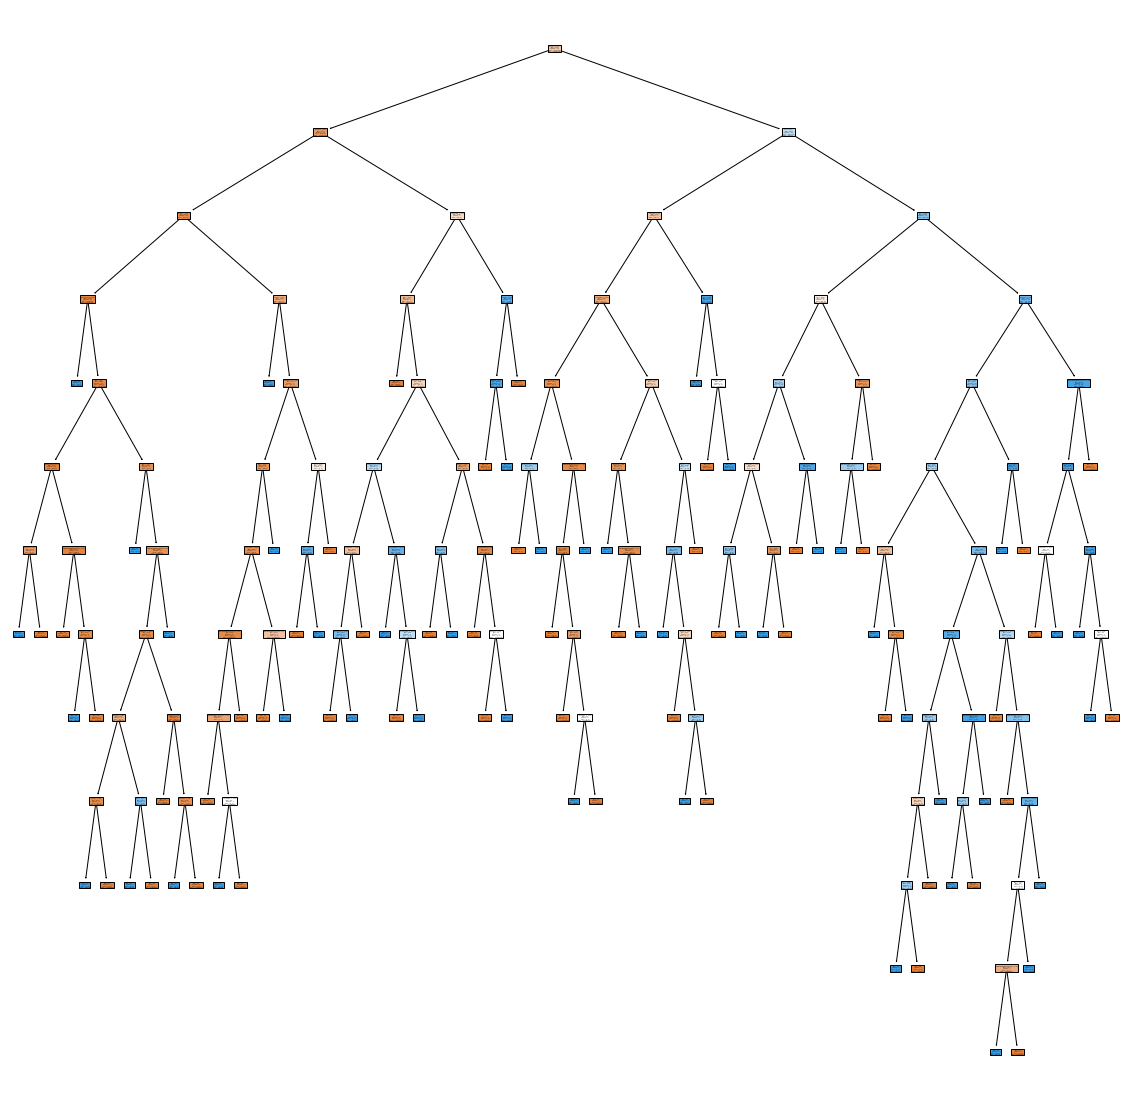

In [19]:
# Building a complete tree
clf_tree = tree.DecisionTreeClassifier(random_state=0)
clf_tree.fit(X_train,y_train)
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)
# Plotting tree
plt.figure(figsize=(20,20))
features = dfDia.columns
classes = ['Not diabetes','Diabetes']
tree.plot_tree(clf_tree,feature_names=features,class_names=classes,filled=True)
plt.show()

In [20]:
# Calculating train and test score (Overfitting)
print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

Train score: 1.0
Test score: 0.7083333333333334


In [21]:
t0 = time()
print("Fitting the classifier to the training set...")
# 10-fold cv with different parameters
params = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],#, 9, 10
    'min_samples_split': [2, 3, 4], #2, 3, 4
     'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2']
}
clf_temp = tree.DecisionTreeClassifier(class_weight = 'balanced', random_state=0)
grid_tree = GridSearchCV(estimator=clf_temp,param_grid=params,cv=10)
grid_tree.fit(X_train,y_train)
clf_pruned_tree = grid_tree.best_estimator_
print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid_tree.best_params_)

Fitting the classifier to the training set...
Elapsed time: 149.403s
Best estimator found by grid search:
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


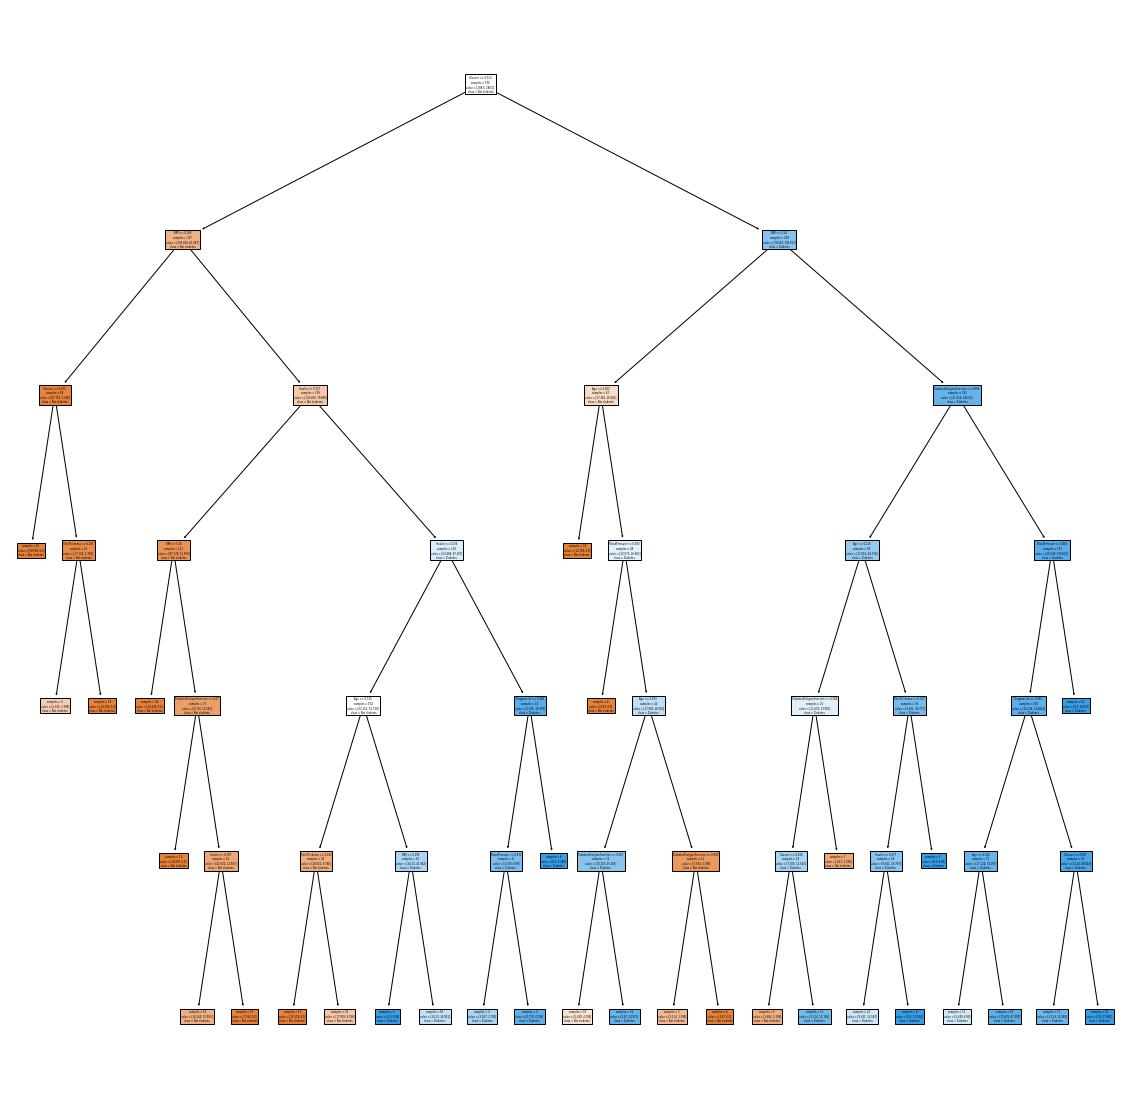

In [22]:
# Plotting pruned tree
plt.figure(figsize=(20,20))
features = dfDia.columns
classes = ['Not diabetes','Diabetes']
tree.plot_tree(clf_pruned_tree,feature_names=features, class_names=classes,filled=True, impurity=False)
plt.show()

In [23]:
#Fitting with the best parameters
clf_pruned_tree.fit(X_train,y_train)
#Predicting
y_train_pred = clf_pruned_tree.predict(X_train)
y_test_pred = clf_pruned_tree.predict(X_test)

print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

Train score: 0.8177083333333334
Test score: 0.7916666666666666


Train confusion matrix


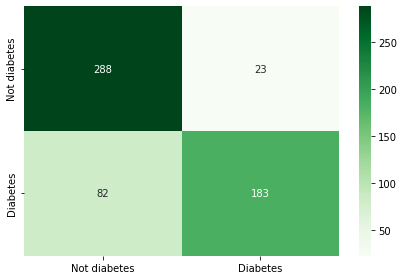

Test confusion matrix


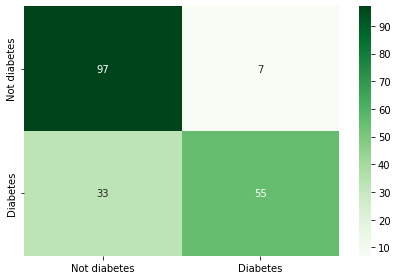

In [24]:
# Plotting confusion matrices
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(str(dom)+" confusion matrix")
    cf_tree = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf_tree,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Greens', fmt='g')
    plt.tight_layout()
    plt.show()
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [25]:
from sklearn.metrics import classification_report
print('Train classification report')
print(classification_report(y_train, y_train_pred, target_names=classes))

print('Test classification report')
print(classification_report(y_test, y_test_pred, target_names=classes))

Train classification report
              precision    recall  f1-score   support

Not diabetes       0.93      0.78      0.85       370
    Diabetes       0.69      0.89      0.78       206

    accuracy                           0.82       576
   macro avg       0.81      0.83      0.81       576
weighted avg       0.84      0.82      0.82       576

Test classification report
              precision    recall  f1-score   support

Not diabetes       0.93      0.75      0.83       130
    Diabetes       0.62      0.89      0.73        62

    accuracy                           0.79       192
   macro avg       0.78      0.82      0.78       192
weighted avg       0.83      0.79      0.80       192



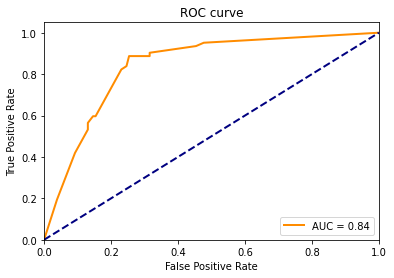

In [28]:
# Plot roc curves
def plot_roccurve(y_test,X_test,clf):
    y_score = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score, drop_intermediate=False, pos_label = 1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
plot_roccurve(y_test,X_test,clf_pruned_tree)

## Support Vector Machine (SVM)

In [29]:
from sklearn import svm
from sklearn.svm import SVC

In [30]:
# Training a Support Vector Machine (SVM)
t0 = time()
print("Fitting the classifier to the training set...")
param_grid={'C': [0.001,0.01,0.1, 1, 100,300,500],    #,700,900,1000#, 1, 1E2, 5E2       
            'degree': [0,1,2,3], #,1,2
            'kernel': ['linear', 'poly', 'rbf'], 
            'gamma' : ['scale','auto'] #[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]
           }
clf_temp = SVC(class_weight='balanced', probability=True,random_state=0)
grid = GridSearchCV(estimator=clf_temp, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
clf_SVM = grid.best_estimator_

print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid.best_params_)

Fitting the classifier to the training set...
Elapsed time: 770.226s
Best estimator found by grid search:
{'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [31]:
y_train_pred = clf_SVM.predict(X_train)
y_test_pred = clf_SVM.predict(X_test)
print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

Train score: 0.8472222222222222
Test score: 0.7760416666666666


Train confusion matrix


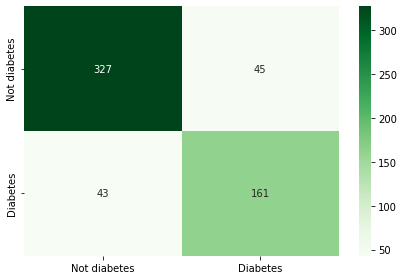

Test confusion matrix


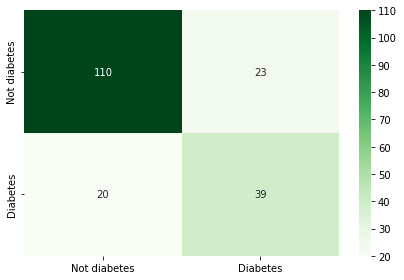

In [32]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [33]:
print('Train classification report')
print(classification_report(y_train, y_train_pred, target_names=classes))

print('Test classification report')
print(classification_report(y_test, y_test_pred, target_names=classes))

Train classification report
              precision    recall  f1-score   support

Not diabetes       0.88      0.88      0.88       370
    Diabetes       0.79      0.78      0.79       206

    accuracy                           0.85       576
   macro avg       0.83      0.83      0.83       576
weighted avg       0.85      0.85      0.85       576

Test classification report
              precision    recall  f1-score   support

Not diabetes       0.83      0.85      0.84       130
    Diabetes       0.66      0.63      0.64        62

    accuracy                           0.78       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.77      0.78      0.77       192



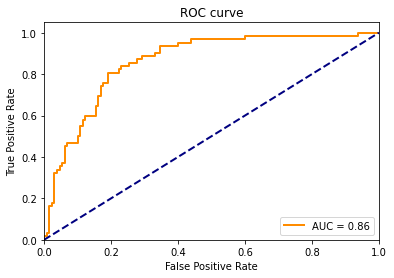

In [34]:
plot_roccurve(y_test,X_test,clf_SVM)

## k nearest neighbors (k-NN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# Training k nearest neighbors (k-NN)
t0 = time()
print("Fitting the classifier to the training set...")
# If the dataset is small it is recommended small values of neighbours
param_grid = {'n_neighbors': [2,3,4,5], #6,7
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}
clf_temp = KNeighborsClassifier()
grid = GridSearchCV(estimator = clf_temp, param_grid = param_grid, cv=10)
grid.fit(X_train, y_train)
clf_KNN = grid.best_estimator_

print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid.best_params_)

Fitting the classifier to the training set...
Elapsed time: 5.669s
Best estimator found by grid search:
{'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [37]:
y_train_pred = clf_KNN.predict(X_train)
y_test_pred = clf_KNN.predict(X_test)
print("Train score: "+str(accuracy_score(y_train_pred,y_train)))
print("Test score: "+str(accuracy_score(y_test_pred,y_test)))

Train score: 0.8506944444444444
Test score: 0.7916666666666666


Train confusion matrix


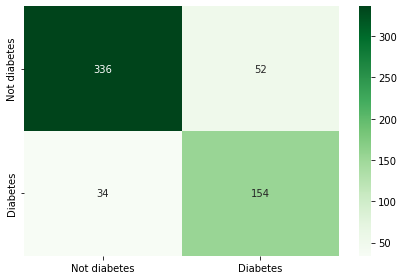

Test confusion matrix


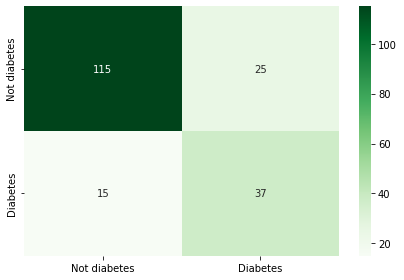

In [38]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [39]:
print('Train classification report')
print(classification_report(y_train, y_train_pred, target_names=classes))

print('Test classification report')
print(classification_report(y_test, y_test_pred, target_names=classes))

Train classification report
              precision    recall  f1-score   support

Not diabetes       0.87      0.91      0.89       370
    Diabetes       0.82      0.75      0.78       206

    accuracy                           0.85       576
   macro avg       0.84      0.83      0.83       576
weighted avg       0.85      0.85      0.85       576

Test classification report
              precision    recall  f1-score   support

Not diabetes       0.82      0.88      0.85       130
    Diabetes       0.71      0.60      0.65        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192



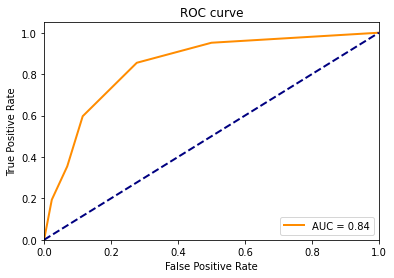

In [40]:
plot_roccurve(y_test,X_test,clf_KNN)